In [28]:
import numpy as np

def vikor_method(matrix, weights, criteria_types, strategy_coefficient=0.5):
    matrix = np.array(matrix)
    weights = np.array(weights)
    
    # # Normalize the matrix
    # normalized_matrix = matrix / np.sqrt(np.sum(matrix**2, axis=0))
    
    # Calculate the worst and best values for each criterion
    worst = np.zeros(matrix.shape[1])
    best = np.zeros(matrix.shape[1])
    for i, crit_type in enumerate(criteria_types):
        if crit_type == 'min':
            worst[i] = np.min(matrix[:, i])
            best[i] = np.max(matrix[:, i])
        elif crit_type == 'max':
            worst[i] = np.max(matrix[:, i])
            best[i] = np.min(matrix[:, i])
    
    # Calculate the S and R values for each alternative
    S = np.zeros(matrix.shape[0])
    R = np.zeros(matrix.shape[0])
    for i in range(matrix.shape[0]):
        S[i] = np.sum(weights * (matrix[i] - worst) / (best - worst))
        R[i] = np.max(weights * (matrix[i] - worst) / (best - worst))
    
    # Calculate the values of 'Q' and 'Q_sort'
    Q = np.zeros(matrix.shape[0])
    for i in range(matrix.shape[0]):
        Q[i] = (strategy_coefficient * (S[i] - S.min()) / (S.max() - S.min())) + ((1 - strategy_coefficient) * (R[i] - R.min()) / (R.max() - R.min()))
    
    Q_sort = np.argsort(Q)
    
    R_sort = np.argsort(R)
    S_sort = np.argsort(S)
    # Return the sorted Q values and ranks
    return Q, Q_sort + 1, R_sort + 1, S_sort + 1


In [29]:
# Example data
matrix = np.array([[5, 8, 4],
                   [7, 6, 8],
                   [8, 8, 6],
                   [7, 4, 6]])
weights = np.array([0.4, 0.3, 0.3])
criteria_types = ['max', 'max', 'max']  # 'max' for maximization criteria and 'min' for minimization criteria

Q_values, q_ranks, r_ranks, s_ranks = vikor_method(matrix, weights, criteria_types)
print("Q values:", Q_values)
print("Q Ranks:", q_ranks)
print("R Ranks:", r_ranks)
print("S Ranks:", s_ranks)

Q values: [1.         0.12121212 0.         0.69393939]
Q Ranks: [3 2 4 1]
R Ranks: [2 3 4 1]
S Ranks: [3 2 4 1]


In [ ]:
!pip install feloopy

In [ ]:
from feloopy import *

m = madm('vikor','vikor_model', 'pydecision')

m.add_dm([
            [250, 16, 12, 5],   #a1
            [200, 16, 8 , 3],   #a2
            [300, 32, 16, 4],   #a3
            [275, 32, 8 , 4],   #a4
            [225, 16, 16, 2]    #a5
            ])

m.add_wv([0.35, 0.30, 0.20, 0.15])

m.sol(['min', 'max', 'max', 'max'],show_graph=False)

m.report(show_tensors=False)

In [ ]:
!pip install pyDecision

In [30]:
import numpy as np
from pyDecision import algorithm

In [32]:
# Call VIKOR
s, r, q, c_solution = algorithm.vikor_method(matrix, weights, criteria_types, strategy_coefficient = 0.5, graph = False)
print("Q values:", q)

a1: 3.0
a2: 2.0
Q values: [[3.         0.        ]
 [2.         0.12121212]
 [4.         0.69393939]
 [1.         1.        ]]


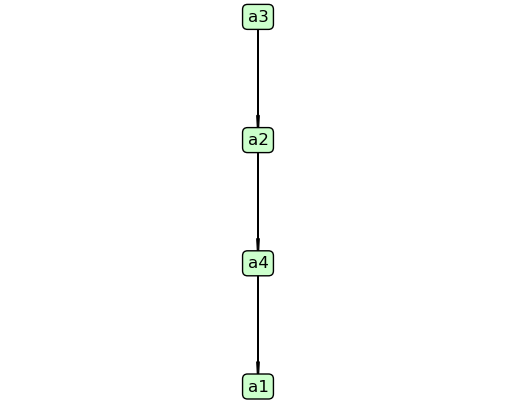

In [18]:
# Graph Solutions
algorithm.ranking(s)

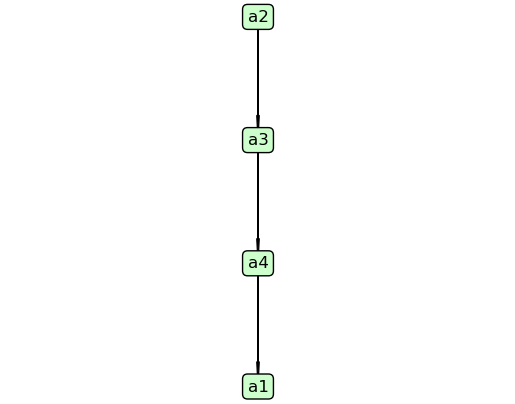

In [19]:
# Graph Solutions
algorithm.ranking(r)

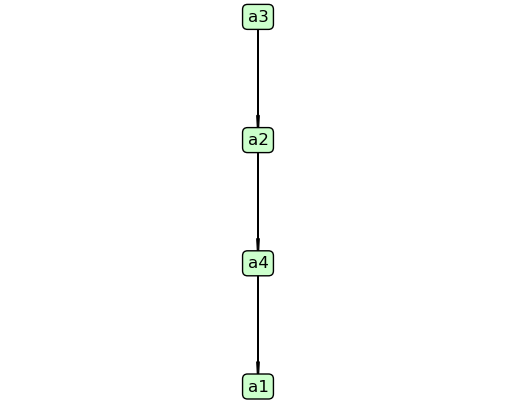

In [20]:
# Graph Solutions
algorithm.ranking(q)